In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np

In [53]:
def visualization(words_dict):
    del words_dict['행복']
    wc = WordCloud(font_path='./malgun.ttf', max_font_size=300, max_words=100,width=400,height=400, background_color='white')
    gen = wc.generate_from_frequencies(words_dict)
    plt.figure(figsize=(8,8))
    plt.imshow(gen)
    plt.axis('off')
    plt.show()

def get_nouns(file) -> dict:
    okt = Okt()
    nouns = okt.nouns(file) # 명사만 추출
    words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외
    return Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

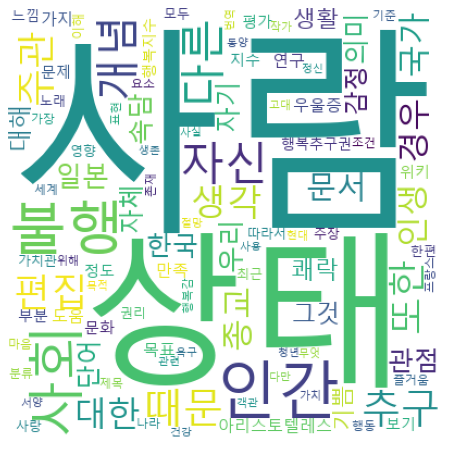

In [63]:
with open('treewiki.txt', 'r', encoding='utf-8') as f:
    treewiki = f.read()

with open('wiki.txt', 'r', encoding='utf-8') as f:
    wiki = f.read()

visualization(get_nouns(treewiki + wiki))
#visualization(get_nouns(treewiki))
#visualization(get_nouns(wiki))

<class 'str'>
